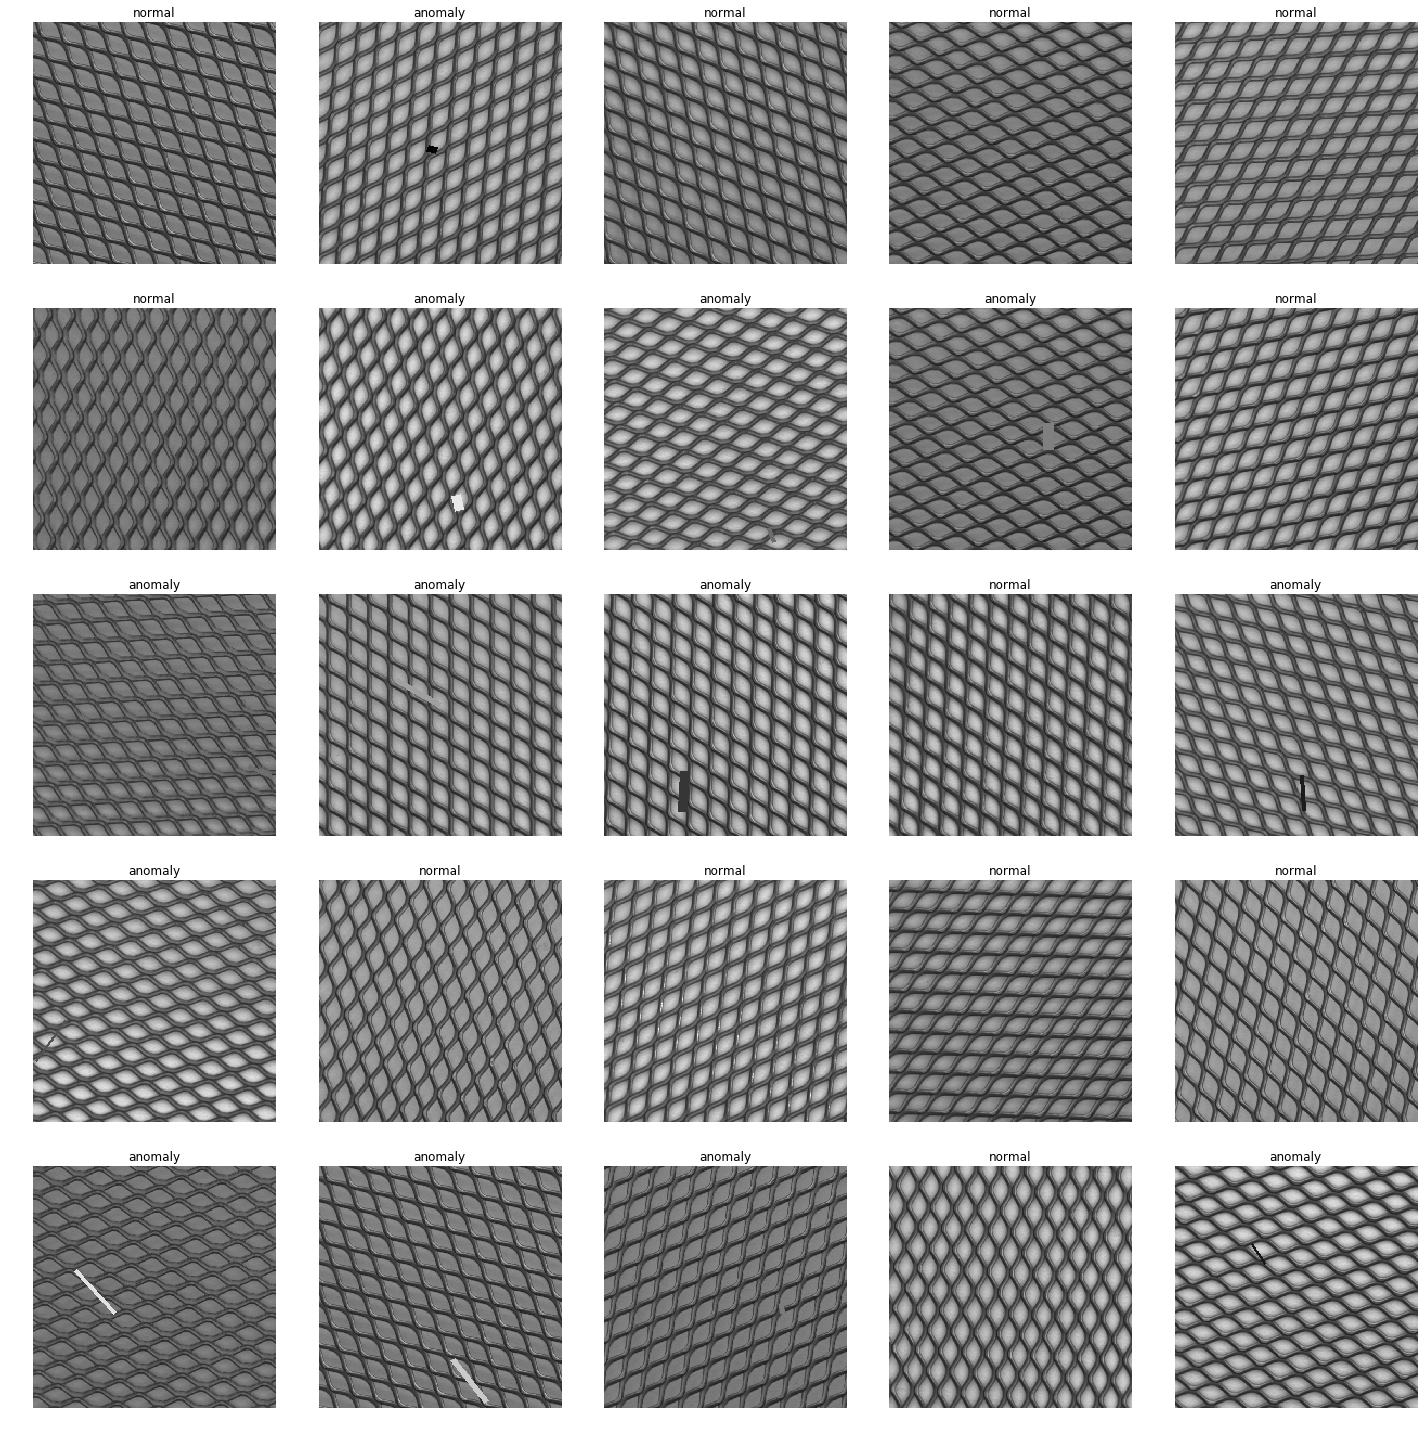

In [1]:
#! wget https://raw.githubusercontent.com/ronghuaiyang/arcface-pytorch/master/models/metrics.py
#! wget https://raw.githubusercontent.com/KaiyangZhou/pytorch-center-loss/master/center_loss.py
from mvtecad_test import *
from fastai.callbacks import SaveModelCallback

fastai_progress_as_text()

PATH = Path('/mnt/dataset/mvtec_ad')

mvtecad = MVTecADTest(PATH, testcases = ['grid',], skip_data_creation=True)
AnomalyTwinImageList.set_params(width_min=1, width_max=10, length=40, color=False)
# AUC = 0.9030910609857978 224 (blob_th=20, width_min=1, width_max=5, length=22, color=False)
# AUC = 0.9273182957393484 512 (width_min=1, width_max=10, length=50, color=False)
# AUC = 0.9807852965747703 224 (width_min=1, width_max=10, length=40, color=False)
mvtecad.set_test(0, 0)
data = mvtecad.databunch()
data.show_batch()

In [ ]:
def learner_ArcFace(data):
    learn = cnn_learner(data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, data, ArcMarginProduct, m=0.5)
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(10)
    learn.unfreeze()
    learn.fit_one_cycle(10)
    learn.fit_one_cycle(10)
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

model_defs = {
    'ArcFace': learner_ArcFace,
}
for name, learner_fn in model_defs.items():
    for i, tc in enumerate(mvtecad.testcases):
        mvtecad.set_test(i, 0)
        mvtecad.test(name, learner_fn, vis_class=None)

In [11]:
paper_table2_compatible_result(mvtecad, reorder=False)

,ArcFace
index,
grid-TPR,0.982456
grid-TNR,1.000000


# Stat: AUC


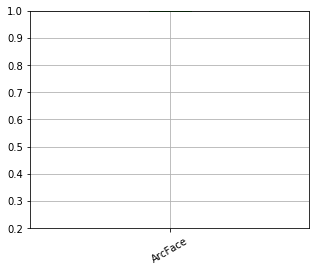

,ArcFace
grid,0.999165


# Stat: Normalized distances


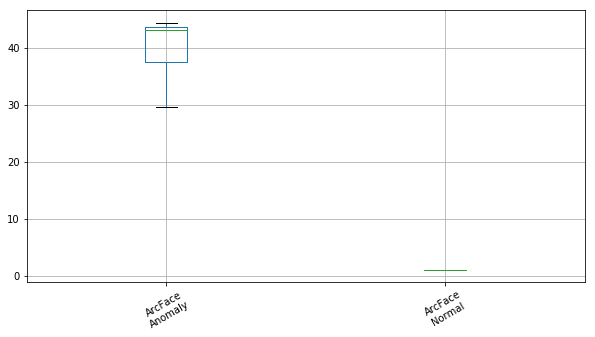

(     ArcFace
 0  43.065744
 1  44.346193
 2  37.389089
 3  43.527593
 4  29.629934,    ArcFace
 0      1.0,        ArcFace
 grid  0.999165)

In [12]:
mvtecad.test_summary()